https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e

In [1]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

In [2]:
# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

/Users/jpinzon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/jpinzon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/jpinzon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/jpinzon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/Users/jpin

In [3]:
# new, 'normal' observations ----
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])
# Accuracy: 0.93
# outliers ----
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])
# Accuracy: 0.96

Accuracy: 0.93
Accuracy: 0.96


In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = X_train.copy()
x = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
pca.fit(x)  

X_pca = pca.fit_transform(X)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

[0.99149091 0.00850909]
[95.28020928  8.82673221]


In [5]:
pred = pd.Series(y_pred_train)
principalDf = pd.DataFrame(data = X_pca, columns = ['pc1', 'pc2'])
principalDf = pd.concat([principalDf, pred], 1).rename(columns = {0:'pred'})

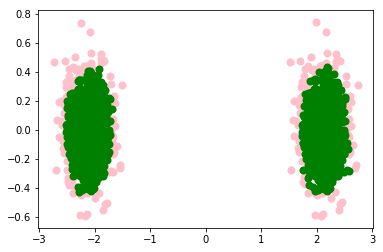

In [6]:
colors = ['pink', 'green', 'darkorange']

for color, i, target_name in zip(colors, [-1, 1], pred.unique()):
    plt.scatter(principalDf.pc1[pred == i], principalDf.pc2[pred  == i],
                color=color, lw=2, label=target_name)